In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

%matplotlib inline
sns.set(style="ticks")

data = pd.read_csv('marvel-wikia-data.csv')
data

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [2]:
# Размеры датасета
data_rows_cnt, data_columns_cnt = data.shape[0], data.shape[1]
print('{} строк, {} столбцов'.format(data_rows_cnt, data_columns_cnt))

16376 строк, 13 столбцов


In [3]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [4]:
# Количество пустых значений
def print_na_stats(data):
    for c in data.columns:
        na_cnt = data[data[c].isna()].shape[0]
        na_percentage = round(na_cnt / data_rows_cnt * 100., 2)
        print('Столбец {}: {} строк, {}%'.format(c, na_cnt, na_percentage))
print_na_stats(data)

Столбец page_id: 0 строк, 0.0%
Столбец name: 0 строк, 0.0%
Столбец urlslug: 0 строк, 0.0%
Столбец ID: 3770 строк, 23.02%
Столбец ALIGN: 2812 строк, 17.17%
Столбец EYE: 9767 строк, 59.64%
Столбец HAIR: 4264 строк, 26.04%
Столбец SEX: 854 строк, 5.21%
Столбец GSM: 16286 строк, 99.45%
Столбец ALIVE: 3 строк, 0.02%
Столбец APPEARANCES: 1096 строк, 6.69%
Столбец FIRST APPEARANCE: 815 строк, 4.98%
Столбец Year: 815 строк, 4.98%


In [5]:
# Проведя первичный анализ данных, можно удалить столбец GSM, так как он имеет более 99% пропущенных значений
data.drop(['GSM'], axis=1)

# Также можно удалить столбец urlslug, так как он не является информативным
data.drop(['urlslug'], axis=1)

,page_id,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


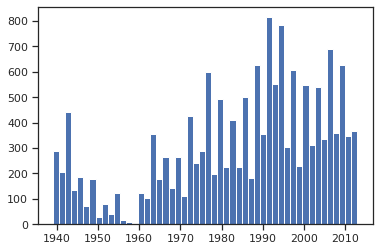

In [6]:
# Построим гистограмму для столбца Year
plt.hist(data['Year'].dropna(), 50)
plt.show()

In [7]:
def impute_col(data, col_name, strategy='median', fill_val='NA'):
    if strategy == 'constant':
        new_col = SimpleImputer(strategy=strategy, fill_value=fill_val).fit_transform(data[[col_name]])
    else:
        new_col = SimpleImputer(strategy=strategy).fit_transform(data[[col_name]])
    data[[col_name]] = new_col

In [8]:
# Произведем импьютацию константой категориального признака
impute_col(data, 'EYE', 'constant', 'NA')
print_na_stats(data)

Столбец page_id: 0 строк, 0.0%
Столбец name: 0 строк, 0.0%
Столбец urlslug: 0 строк, 0.0%
Столбец ID: 3770 строк, 23.02%
Столбец ALIGN: 2812 строк, 17.17%
Столбец EYE: 0 строк, 0.0%
Столбец HAIR: 4264 строк, 26.04%
Столбец SEX: 854 строк, 5.21%
Столбец GSM: 16286 строк, 99.45%
Столбец ALIVE: 3 строк, 0.02%
Столбец APPEARANCES: 1096 строк, 6.69%
Столбец FIRST APPEARANCE: 815 строк, 4.98%
Столбец Year: 815 строк, 4.98%


In [9]:
# Произведем импьютацию медианой количественного признака APPEARANCES
impute_col(data, 'APPEARANCES')
print_na_stats(data)

Столбец page_id: 0 строк, 0.0%
Столбец name: 0 строк, 0.0%
Столбец urlslug: 0 строк, 0.0%
Столбец ID: 3770 строк, 23.02%
Столбец ALIGN: 2812 строк, 17.17%
Столбец EYE: 0 строк, 0.0%
Столбец HAIR: 4264 строк, 26.04%
Столбец SEX: 854 строк, 5.21%
Столбец GSM: 16286 строк, 99.45%
Столбец ALIVE: 3 строк, 0.02%
Столбец APPEARANCES: 0 строк, 0.0%
Столбец FIRST APPEARANCE: 815 строк, 4.98%
Столбец Year: 815 строк, 4.98%
